# Visualising The Gender Gap in College Degrees

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate degree category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the dataset and made it available. Randal compiled this data set to explore the gender gap in STEM fields (science, technology, engineering, and mathematics). This gap is often reported in the news, but not everyone agrees there is a gap.


## Introduction to the Data Set

In [1]:
# import the relevant data analysis and graph plotting libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the raw data set into a 'dataframe' called 'women_degrees' using the Pandas library
women_degrees = pd.read_csv(r'C:\projectdatasets\percent-bachelors-degrees-women-usa.csv')

In [3]:
# show the first five rows
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [4]:
# show summary statistics on the dataset
women_degrees.describe()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1990.500000,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.267844,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,1970.000000,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,1980.250000,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,1990.500000,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,2000.750000,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,2011.000000,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


## Visualising Gap Across Some Degree Categories

We will create some line plots to show the number of degrees awarded to both women and men, between 1970-2012

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


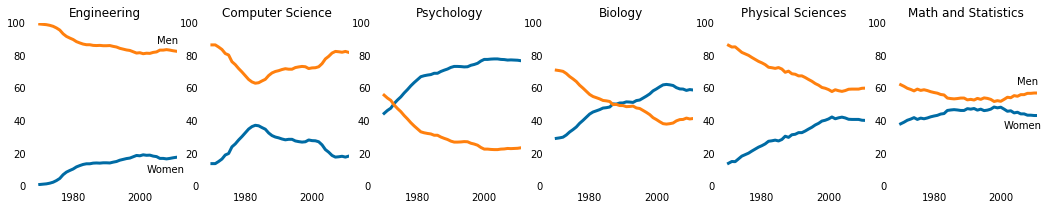

In [5]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 
             'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, 
            label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, 
            label='Men', linewidth=3)
    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

## Visualising Gap Across All Degree Categories

We will create some line plots to show the number of degrees awarded to both women and men, between 1970-2012. These plots will be enhanced with the following features:

- they will include liberal arts degrees and other categories of degrees
- we will remove the X-axis from all plots (to de-clutter the diagrams) but leave the X-axis for the bottom plots only
- we will modify the Y-axis to include only '0' and '100' (to declutter the plots)
- we will add a horizontal line to each plot indicating the median value on the Y-axis
- we will also add an export at the end to export the file

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


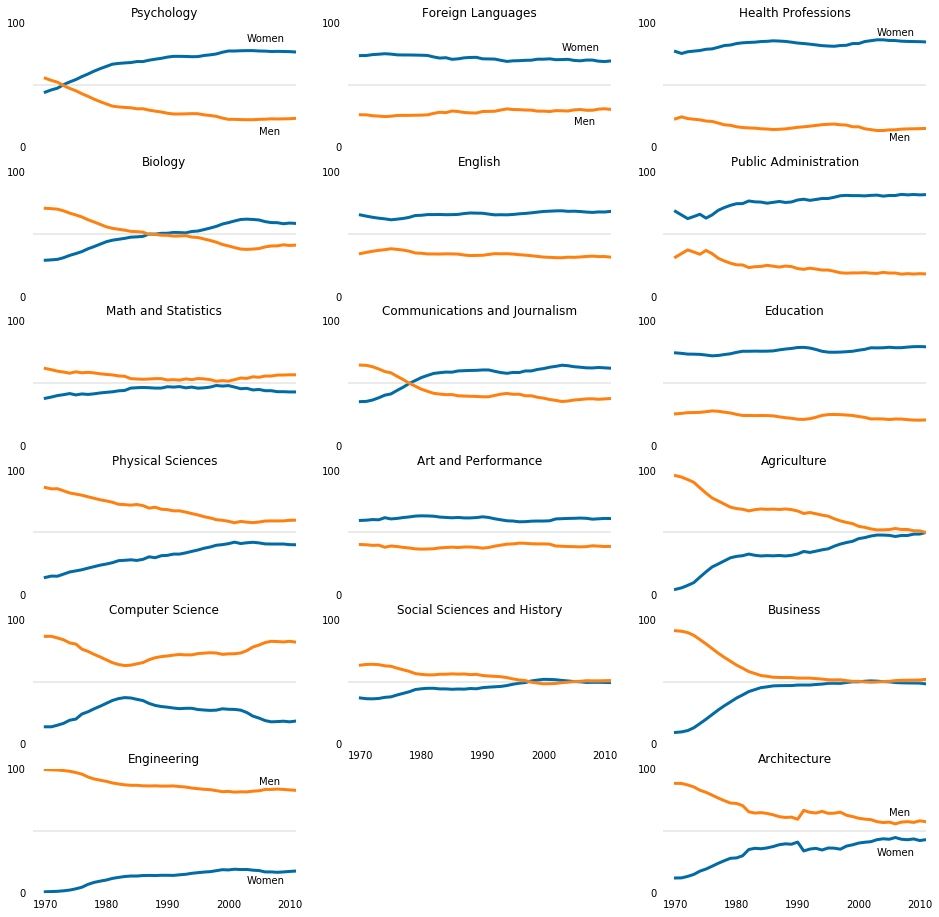

In [6]:
# create lists to include the other degree categories:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 
             'Computer Science', 'Engineering']

lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 
                 'Art and Performance', 'Social Sciences and History']

other_cats = ['Health Professions', 'Public Administration', 'Education', 
              'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(16, 16))

# generate first column of line charts, which include only STEM degrees
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, 
            label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, 
            label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

# generate second column of line charts, which include liberal arts degrees
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, 
            label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, 
            label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# generate third column of line charts which include other category degrees
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, 
            label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, 
            label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')

# export file before calling pyplot.show()
fig.savefig("gender_degrees.png")
plt.show()

## Findings

We can see that the gender gap appears to close between 1970-2012 for a wide range of subjects, including Architecture, Business, Social Sciences Agriculture and Biology. However, it would appear that the gender gap has remained for other subjects, such as Computer Science, Education, Foreign Languages and Engineering. We can even see that the gender gap has increased for a few subjects, including Psychology and Public Administration.